<a href="https://colab.research.google.com/github/Sylva-gif/devops-exercises/blob/master/Tp1_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Faculté des Sciences de Kénitra
Licence Universitaire Spécialisée (LUS)
Intelligence Artificielle, Big Data  et CyberSécurité (IABDCyS)

Nom binome : AGASSOUNON and Yantour

Prenon Binome : Sylvestre and Ibrahim

1- Transformation des données  
   a) Création du fichier CSV
      /content/TBANK.csv

      
   b)Chargement en DataFrame

In [8]:
import pandas as pd

# Charger le fichier CSV avec l'encodage 'latin1'
df = pd.read_csv("/content/TBANK.csv", encoding='latin1')

# Afficher les premières lignes
print(df.head())

   Age  Revenu  Montant_Credit        Statut      Agence
0   25    3000           20000  Non solvable  Casablanca
1   35    6000           50000      Solvable       Rabat
2   45    8000           70000      Solvable         Fès
3   30    4000           30000  Non solvable  Casablanca
4   50   10000           90000      Solvable       Rabat


2. Visualisation univariée

   a) Histogramme de l’âge (DataFrame)

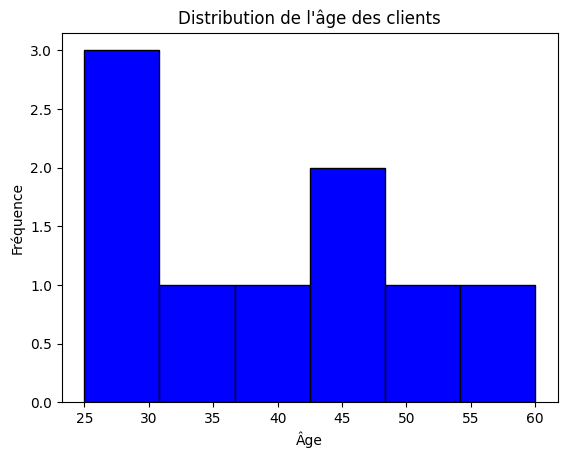

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

plt.hist(df['Age'], bins=6, color='blue', edgecolor='black')
plt.title("Distribution de l'âge des clients")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()


b) Histogramme du revenu (CSV)

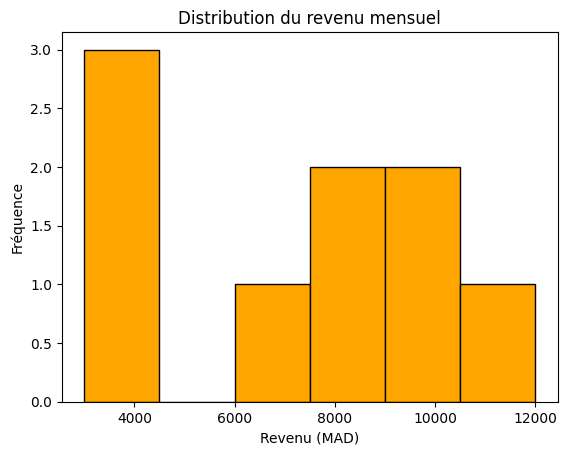

In [14]:

plt.hist(df['Revenu'], bins=6, color='orange', edgecolor='black')
plt.title("Distribution du revenu mensuel")
plt.xlabel("Revenu (MAD)")
plt.ylabel("Fréquence")
plt.show()


c) Boxplot du revenu

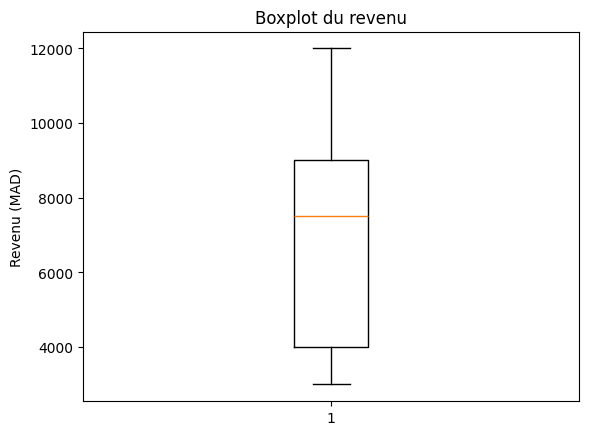

In [15]:
plt.boxplot(df['Revenu'])
plt.title("Boxplot du revenu")
plt.ylabel("Revenu (MAD)")
plt.show()


Identification des valeurs aberrantes et commentaires

 On constact une variete entre les revenus qui est de :[4000 MAD , 9000 MAD ]
 Ce qui expliqu'il y a une grande differnces entre le revenir Min et Max

3. Visualisation bivariée (Revenu vs Montant du crédit)

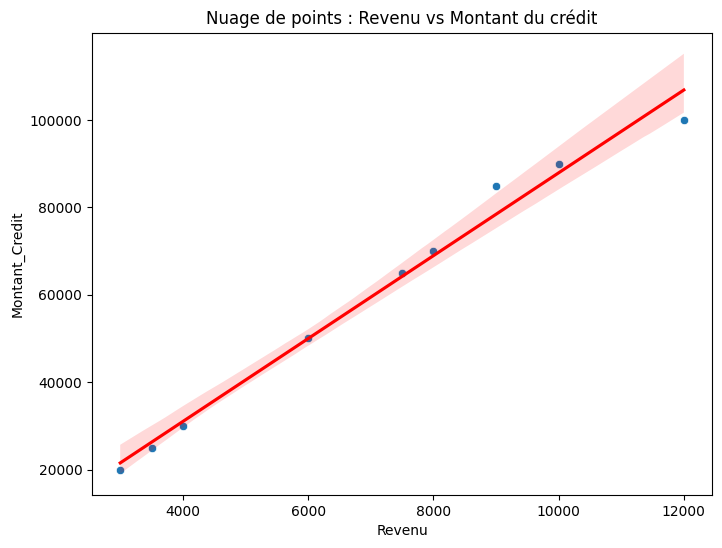

In [20]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Revenu', y='Montant_Credit', data=df)
sns.regplot(x='Revenu', y='Montant_Credit', data=df, scatter=False, color='red')
plt.title("Nuage de points : Revenu vs Montant du crédit")
plt.show()


On peut constacter ici que plus les revenu augmente , il a moin de Montant de crédit

4. Bivariée (Catégorie – Quantité)

    Comparer le montant du crédit selon le statut du client :

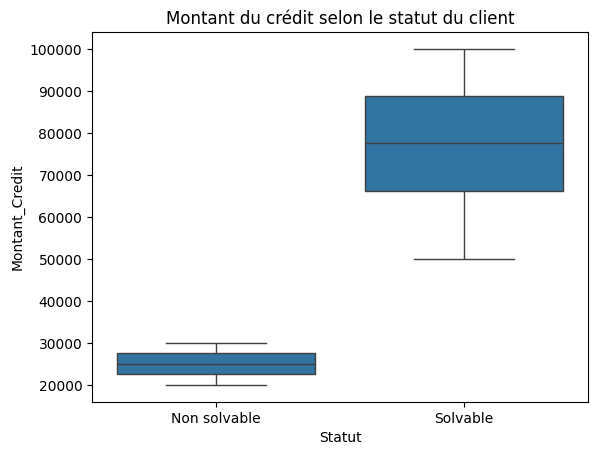

In [21]:
sns.boxplot(x='Statut', y='Montant_Credit', data=df)
plt.title("Montant du crédit selon le statut du client")
plt.show()


In [22]:
print(df.groupby('Statut')['Montant_Credit'].mean())


Statut
Non solvable    25000.000000
Solvable        76666.666667
Name: Montant_Credit, dtype: float64


 On peut en conclut que ces les client Solvable qui demande en moyenne un crédit plus élevé soit : 76666.666667 MAD

5. Visualisation multivariée (Corrélation)

     a) Matrice de corrélation

In [23]:
corr = df[['Age','Revenu','Montant_Credit']].corr()
print(corr)


                     Age    Revenu  Montant_Credit
Age             1.000000  0.994145        0.983077
Revenu          0.994145  1.000000        0.992793
Montant_Credit  0.983077  0.992793        1.000000


b) Heatmap

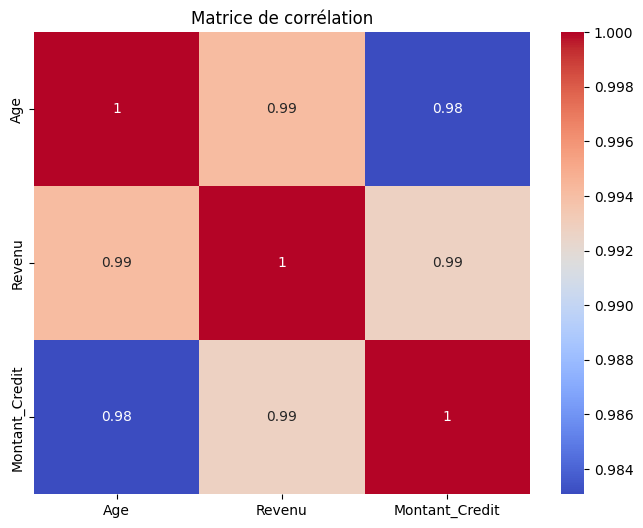

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

# En résumer

  Les trois variables (Age, Revenu, Montant_Credit) sont fortement corrélées entre elles.

Cela signifie que l’âge et le revenu sont de bons indicateurs pour estimer le montant du crédit demandé.

En gestion du risque de crédit :

Les clients jeunes avec revenus faibles demandent des crédits plus modestes.

Les clients plus âgés et solvables demandent des crédits plus élevés, mais la banque doit vérifier leur capacité de remboursement.